In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pylab as plt
import math

In [2]:
h_arr = [0, 4e5, 10e5, 40e5, 100e5]
a_arr = [-186.555305, -94.919, 0.61289, 0.0, 0.001128292]
b_arr = [1222.6562, 1144.9069, 1305.5948, 540.1778, 1]
c_arr = [994186.38, 878153.55, 636143.04, 772170.16, 10e9]

def xatm(h):
    if h < h_arr[1]:
        ii = 0
        return a_arr[ii] + b_arr[ii] * math.exp(-h/c_arr[ii])
    elif h < h_arr[2]:
        ii = 1
        return a_arr[ii] + b_arr[ii] * math.exp(-h/c_arr[ii])
    elif h < h_arr[3]:
        ii = 2
        return a_arr[ii] + b_arr[ii] * math.exp(-h/c_arr[ii])
    elif h < h_arr[4]:
        ii = 3
        return a_arr[ii] + b_arr[ii] * math.exp(-h/c_arr[ii])
    else:
        ii = 4
        return a_arr[ii] - b_arr[ii] * (h/c_arr[ii])
        

a5 = 1.00892857e+03, c5 = 1.12000000e+04
rho = 8.92857143e-05, a=9.91071429e+02, b=2.42703735e+01, c=1.00000000e+05, h0=1.00000000e+05


(0.0, 300000.0)

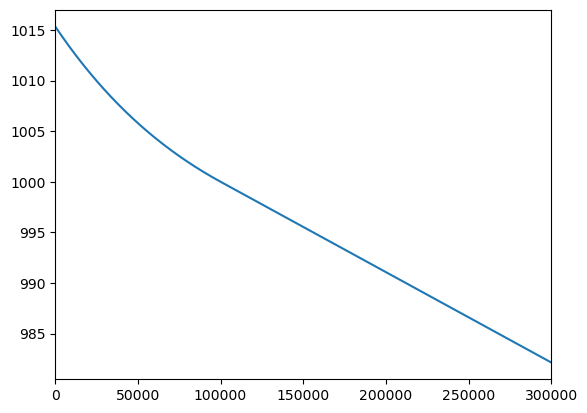

In [6]:
x_at_h0 = 1000
htop = 113e5
h0 = 1e5
rho = x_at_h0/(113e5 - h0)
a5 = rho*htop
c5 = 1/rho
a = x_at_h0 - h0*rho
b = h0/c5*math.exp(1)
c = h0

# # a5 = 12930
# c5 = 1/rho
# a = a5 - 2*pp
# b = math.exp(1)*pp
# c = c5*pp
# h0 = c5*pp

def xfun(h):
    if h < h0:
        return a + b *math.exp(-h/c)
    else:
        return a5 - h/c5

hh = np.linspace(0, 3e5, 1000)

xdepth_fun = np.frompyfunc(lambda x: np.float64(xfun(x)), 1, 1)
xdepth_xatm = np.frompyfunc(lambda x: np.float64(xatm(x)), 1, 1)
xdepth = xdepth_fun(hh).astype("float64")
xdepth_atm = xdepth_xatm(hh).astype("float64")
print(f"a5 = {a5:.8e}, c5 = {c5:.8e}")
print(f"rho = {rho:.8e}, a={a:.8e}, b={b:.8e}, c={c:.8e}, h0={h0:.8e}")
plt.plot(hh, xdepth)
# plt.plot(hh, xdepth_atm)
# plt.plot((hh[1:] + hh[:-1])/2, (xdepth[1:] - xdepth[:-1])/(hh[1:] - hh[:-1]))
# plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 3e5)
# plt.ylim(1e-3, 2e-3)

In [74]:
xatm(10)

1306.1871665570611

In [118]:
(1.00892857e3 - 0) * 1.12e4/1e5


112.99999984000002

In [53]:
1.033e4*0.139/1e3

1.4358700000000002

In [ ]:
# h=143, X=14.096117926440979 km
# h=647, X=3.808506428696458 km
# h=1033, X=0.025232939039804742 km

In [44]:
xatm(0.025232939039804742e5)

1033.0016681206685

The case for homogenious atmosphere with density as at the surface and X = 3000 at h = 1m

a5 = 3.12930000e+03, c5 = 7.73395205e+02, htop = 2.42018561e+06
rho = 1.29300000e-03, a=2.87070000e+03, b=3.51473840e+02, c=1.00000000e+05, h0=1.00000000e+05,
 X_bot = 3.22217384e+03


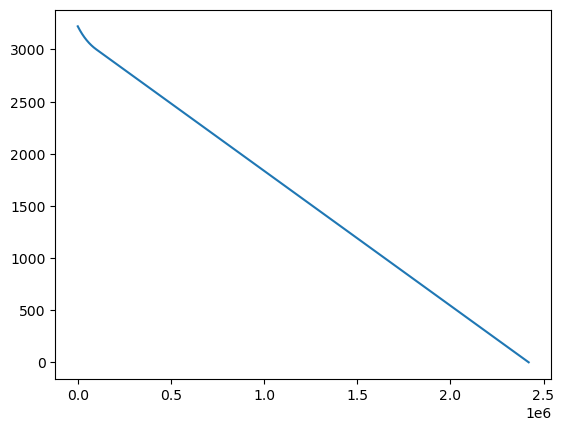

In [37]:
rho = 1.293e-3 # g/cm3
X0 = 3000
h0 = 1e5 # 1 km



htop = h0 + X0/rho
c5 = 1/rho
a5 = X0 + h0/c5

a = X0 - h0/c5
b = math.exp(1) * h0/c5
c = h0

X_bot = a + b

def xfun1(h):
    if h < h0:
        return a + b * math.exp(-h/c)
    else:
        return a5 - h/c5

hh = np.geomspace(1, htop, 1000)

xdepth_fun1 = np.frompyfunc(lambda x: np.float64(xfun1(x)), 1, 1)
xdepth = xdepth_fun1(hh).astype("float64")
print(f"a5 = {a5:.8e}, c5 = {c5:.8e}, htop = { htop :.8e}")
print(f"rho = {rho:.8e}, a={a:.8e}, b={b:.8e}, c={c:.8e}, h0={h0:.8e},\n X_bot = {X_bot:.8e}")
plt.plot(hh, xdepth)
# plt.plot((hh[1:] + hh[:-1])/2, (xdepth[1:] - xdepth[:-1])/(hh[1:] - hh[:-1]))
# plt.xscale("log")
# plt.yscale("log")


In [38]:
xfun1(0)

3222.1738404197545

a5 = 5.83707226e+02, c5 = 1.93247565e+04, htop = 1.12800000e+07
rho = 5.17470945e-05, a=-5.75427691e+02, b=1.57542769e+03, c=1.12000000e+07, h0=1.12000000e+07,
 X_bot = 1.00000000e+03


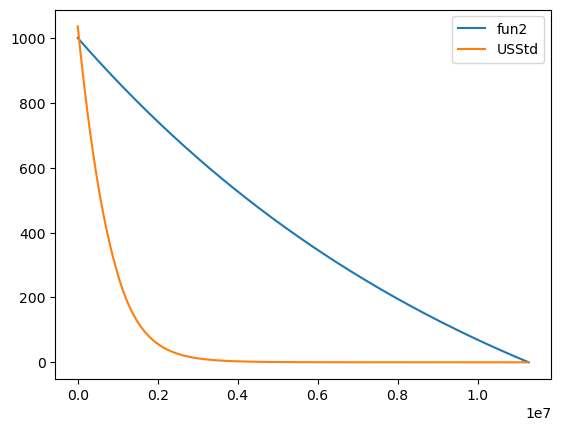

In [7]:
# This is the case when exponential atmosphere is
# practically goes up top

e_nat = math.exp(1)
htop = 112.8e5
h0 = 112e5
X_bot = 1000

c5 = (htop + h0*(e_nat - 2))/X_bot
a5 = htop/c5
rho = 1/c5


a = a5 - 2*h0/c5
b = math.exp(1) * h0/c5
c = h0

X_bot = a + b

def xfun2(h):
    if h < h0:
        return a + b * math.exp(-h/c)
    else:
        return a5 - h/c5

hh = np.geomspace(1, htop, 1000)

fxdepth_fun2 = np.frompyfunc(lambda x: np.float64(xfun2(x)), 1, 1)
fxdepth_atm = np.frompyfunc(lambda x: np.float64(xatm(x)), 1, 1)
xdepth_fun2 = fxdepth_fun2(hh).astype("float64")
xdepth_atm = fxdepth_atm(hh).astype("float64")
print(f"a5 = {a5:.8e}, c5 = {c5:.8e}, htop = { htop :.8e}")
print(f"rho = {rho:.8e}, a={a:.8e}, b={b:.8e}, c={c:.8e}, h0={h0:.8e},\n X_bot = {X_bot:.8e}")
plt.plot(hh, xdepth_fun2, label = "fun2")
plt.plot(hh, xdepth_atm, label = "USStd")
plt.legend()
# plt.plot((hh[1:] + hh[:-1])/2, (xdepth[1:] - xdepth[:-1])/(hh[1:] - hh[:-1]))
# plt.xscale("log")
# plt.yscale("log")


In [53]:
xfun2(0)

1000.0000000000001

a5 = 1.45127501e+04, c5 = 7.77247586e+02, htop = 1.12800000e+07
rho = 1.28659132e-03, rho_lin = 1.29300000e-03,
 a=-1.44087935e+06, b=1.45546439e+06, c=1.12000000e+09, h0=1.12000000e+07,
 X_bot = 1.45850400e+04


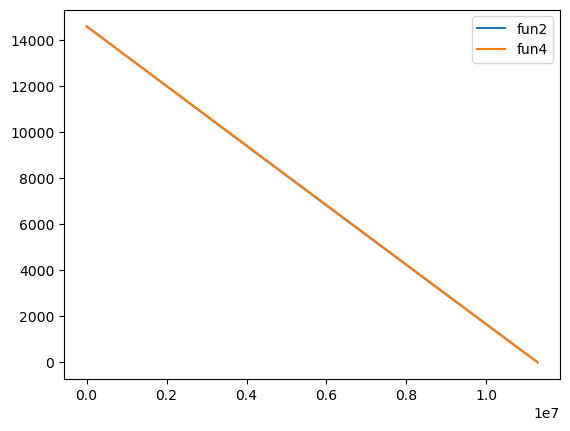

In [16]:
# Trying to use exponent as linear function:

e_nat = math.exp(1)
htop = 112.8e5
h0 = 112e5
X_bot = 1.293e-3 * htop # g/cm3
kpar0 = 100

c5 = (htop + h0*(kpar0*e_nat**(1/kpar0) - kpar0 - 1))/X_bot
a5 = htop/c5
rho = 1/c5


a = a5 - (kpar0 + 1)*h0/c5
b = e_nat**(1/kpar0) * kpar0*h0/c5
c = kpar0*h0

X_bot = a + b

rho_lin = X_bot/htop

def xfun3(h):
    if h < h0:
        return a + b * math.exp(-h/c)
    else:
        return a5 - h/c5
    
def xfun4(h):
    return X_bot*(1 - h/htop)  

hh = np.geomspace(1, htop, 1000)

fxdepth_fun2 = np.frompyfunc(lambda x: np.float64(xfun2(x)), 1, 1)
fxdepth_atm = np.frompyfunc(lambda x: np.float64(xatm(x)), 1, 1)
fxdepth_fun4 = np.frompyfunc(lambda x: np.float64(xfun4(x)), 1, 1)
xdepth_fun2 = fxdepth_fun2(hh).astype("float64")
xdepth_fun4 = fxdepth_fun4(hh).astype("float64")
xdepth_atm = fxdepth_atm(hh).astype("float64")
print(f"a5 = {a5:.8e}, c5 = {c5:.8e}, htop = { htop :.8e}")
print(f"rho = {rho:.8e}, rho_lin = {rho_lin:.8e},\n a={a:.8e}, b={b:.8e}, c={c:.8e}, h0={h0:.8e},\n X_bot = {X_bot:.8e}")
plt.plot(hh, xdepth_fun2, label = "fun2")
plt.plot(hh, xdepth_fun4, label = "fun4")
# plt.plot(hh, xdepth_atm, label = "USStd")
# plt.plot(hh, xdepth_fun4/xdepth_fun2, label = "fun4")
plt.legend()
# plt.plot((hh[1:] + hh[:-1])/2, (xdepth[1:] - xdepth[:-1])/(hh[1:] - hh[:-1]))
# plt.xscale("log")
# plt.yscale("log")


In [ ]:
xfun3()

In [10]:
xatm(0)

1036.1008949999998